# Y boxplot - normal

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

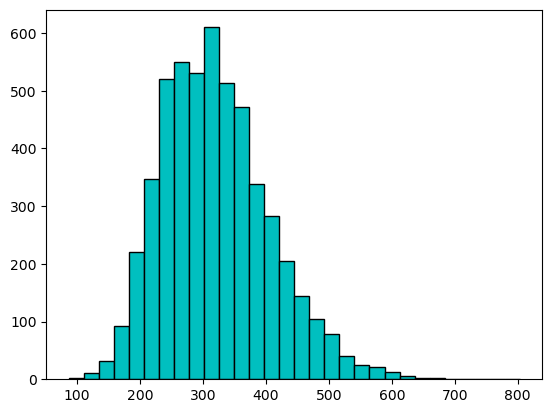

In [4]:
d = pd.read_excel("../data/data30.xlsx")
plt.hist(d["UricAcid"], bins=30, color='c', edgecolor='black')
plt.show()

In [5]:
# Find optimal lambda and transformed data
transformed_data, best_lambda = stats.boxcox(d["UricAcid"])
print(f"Optimal lambda: {best_lambda}")

Optimal lambda: 0.20137863639278175


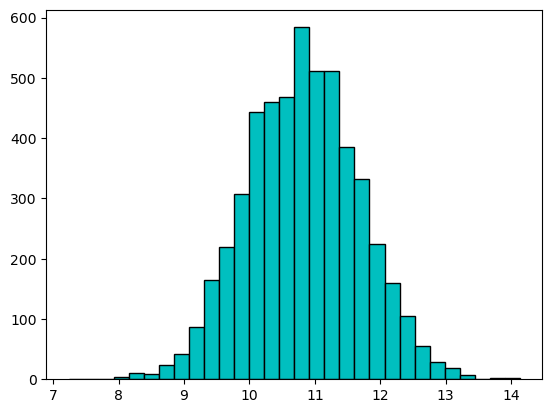

In [6]:
plt.hist(transformed_data, bins=30, color='c', edgecolor='black')
plt.show()

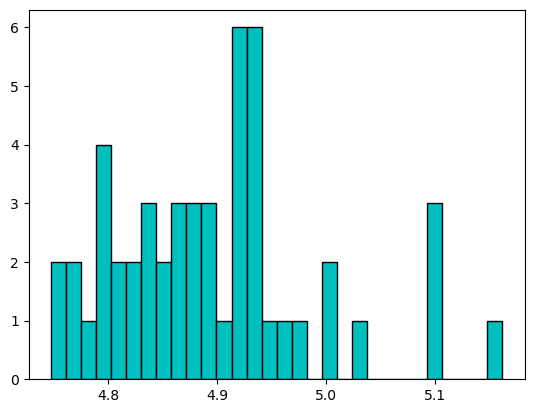

In [5]:
plt.hist(np.log(d["SOD32"]), bins=30, color='c', edgecolor='black')
plt.show()

# Functions

In [1]:
#%% 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9

from plotnine import *
from glob import glob
from pathlib import Path
import plotnine
import pandas as pd
import numpy as np
from glob import glob

palette = ['#D55E00', #橙红色
           '#E69F00', #橙黄色
           '#0072B2', #深蓝色
           '#009E73', #酸橙绿
           #'#F0E442', #亮黄色
           '#CC79A7', #淡紫色
           '#56B4E9' #天蓝色
           ]
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


In [2]:
def read_file(all_files1, gmm):
  li = []
  for filename in all_files1:
      df = pd.read_csv(filename, index_col=None, header=0)
      li.append(df)
  # 删除li中每个df的第一列
  for i in range(len(li)):
      li[i] = li[i].drop(li[i].columns[0], axis=1)
  # 分别给li中的每一个df增加新列
  # 新列名称叫group_cat，若为li的第一个元素则为trial1
  # 若为li的第二个元素则为trial2，以此类推
  for i in range(len(li)):
      li[i]['group_cat'] = 'trial' + str(i+1)
  # 将li中的每个df按照列纵向合并成一个df
  li = pd.concat(li, axis=0, ignore_index=True)
  # 增加一列cover,若lower到upper包含0，则为1，否则为0
  li['cover'] = np.where((li['mean_low'] <= 0) & (li['mean_high'] >= 0), 1, 0)
  # 增加一列gmm为1
  li['gmm'] = gmm

  return li

def process_for_plot(path, alpha, gmm1, gmm2, gmm3, nplot, rr):
  path1 = path + 'alpha_' + str(alpha) + '_gmm_' + str(gmm1) + '/'
  path2 = path + 'alpha_' + str(alpha) + '_gmm_' + str(gmm2) + '/'
  path3 = path + 'alpha_' + str(alpha) + '_gmm_' + str(gmm3) + '/'
  
  all_files1 = glob(path1 + "*.csv")
  all_files2 = glob(path2 + "*.csv")
  all_files3 = glob(path3 + "*.csv")

  li = read_file(all_files1, gmm1)
  li2 = read_file(all_files2, gmm2)
  li3 = read_file(all_files3, gmm3)

  groups = np.unique(li.group_cat)
  xpos = []
  labelpos = np.arange(len(groups))*rr*2
  for r in labelpos:
      xpos.extend(list(np.linspace(r-(rr-1), r+(rr-1), num=nplot)))

  li = li.groupby(['group_cat'], sort=False) \
          .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
          .reset_index(drop=True)
  li['cover'] = pd.Categorical(li['cover'],categories=[1,0])
  li['xpos'] = np.array(xpos)
  #li = li.round(1)
  
  # 对li2执行相同的操作
  li2 = li2.groupby(['group_cat'], sort=False) \
          .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
          .reset_index(drop=True)
  li2['cover'] = pd.Categorical(li2['cover'],categories=[1,0])
  li2['xpos'] = np.array(xpos)
  
  # 对li3执行相同的操作
  li3 = li3.groupby(['group_cat'], sort=False) \
          .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
          .reset_index(drop=True)
  li3['cover'] = pd.Categorical(li3['cover'],categories=[1,0])
  li3['xpos'] = np.array(xpos)
  
  # 将li和li2和li3合并
  li = pd.concat([li, li2, li3], axis=0, ignore_index=True)
  
  return li,labelpos

In [9]:
# # 循环读取文件夹下所有csv文件
# path = r'../results/ITE/VD-log2/'
# path1 = path+'alpha_0.2_gmm_1/'
# path2 = path+'alpha_0.2_gmm_2/'
# path3 = path+'alpha_0.2_gmm_3/'

# all_files1 = glob(path1 + "*.csv")
# all_files2 = glob(path2 + "*.csv")
# all_files3 = glob(path3 + "*.csv")

# li = []
# for filename in all_files1:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)
# # 删除li中每个df的第一列
# for i in range(len(li)):
#     li[i] = li[i].drop(li[i].columns[0], axis=1)
# # 分别给li中的每一个df增加新列
# # 新列名称叫group_cat，若为li的第一个元素则为trial1
# # 若为li的第二个元素则为trial2，以此类推
# for i in range(len(li)):
#     li[i]['group_cat'] = 'trial' + str(i+1)
# # 将li中的每个df按照列纵向合并成一个df
# li = pd.concat(li, axis=0, ignore_index=True)
# # 增加一列cover,若lower到upper包含0，则为1，否则为0
# li['cover'] = np.where((li['mean_low'] <= 0) & (li['mean_high'] >= 0), 1, 0)
# # 增加一列gmm为1
# li['gmm'] = 1

# # 继续读取另一个文件夹下的csv文件
# li2 = []
# for filename in all_files2:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li2.append(df)
# # 删除li中每个df的第一列
# for i in range(len(li2)):
#     li2[i] = li2[i].drop(li2[i].columns[0], axis=1)
# # 分别给li中的每一个df增加新列
# # 新列名称叫group_cat，若为li的第一个元素则为trial1
# # 若为li的第二个元素则为trial2，以此类推
# for i in range(len(li2)):
#     li2[i]['group_cat'] = 'trial' + str(i+1)
# # 将li中的每个df按照列纵向合并成一个df
# li2 = pd.concat(li2, axis=0, ignore_index=True)
# # 增加一列cover,若lower到upper包含0，则为1，否则为0
# li2['cover'] = np.where((li2['mean_low'] <= 0) & (li2['mean_high'] >= 0), 1, 0)
# # 增加一列gmm为2
# li2['gmm'] = 2

# # 继续读取另一个文件夹下的csv文件
# li3 = []
# for filename in all_files3:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li3.append(df)
# # 删除li中每个df的第一列
# for i in range(len(li3)):
#     li3[i] = li3[i].drop(li3[i].columns[0], axis=1)
# # 分别给li中的每一个df增加新列
# # 新列名称叫group_cat，若为li的第一个元素则为trial1
# # 若为li的第二个元素则为trial2，以此类推
# for i in range(len(li3)):
#     li3[i]['group_cat'] = 'trial' + str(i+1)
# # 将li中的每个df按照列纵向合并成一个df
# li3 = pd.concat(li3, axis=0, ignore_index=True)
# # 增加一列cover,若lower到upper包含0，则为1，否则为0
# li3['cover'] = np.where((li3['mean_low'] <= 0) & (li3['mean_high'] >= 0), 1, 0)
# # 增加一列gmm为3
# li3['gmm'] = 3

In [10]:
# groups = np.unique(li.group_cat)
# nplot = 15
# rr = 5
# xpos = []
# labelpos = np.arange(len(groups))*rr*2
# for r in labelpos:
#     xpos.extend(list(np.linspace(r-(rr-1), r+(rr-1), num=nplot)))
# li = li.groupby(['group_cat'], sort=False) \
#         .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
#         .reset_index(drop=True)
# li['cover'] = pd.Categorical(li['cover'],categories=[1,0])
# li['xpos'] = np.array(xpos)
# #li = li.round(1)
# # 对li2执行相同的操作
# li2 = li2.groupby(['group_cat'], sort=False) \
#         .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
#         .reset_index(drop=True)
# li2['cover'] = pd.Categorical(li2['cover'],categories=[1,0])
# li2['xpos'] = np.array(xpos)
# # 对li3执行相同的操作
# li3 = li3.groupby(['group_cat'], sort=False) \
#         .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
#         .reset_index(drop=True)
# li3['cover'] = pd.Categorical(li3['cover'],categories=[1,0])
# li3['xpos'] = np.array(xpos)
# # 将li和li2和li3合并
# li = pd.concat([li, li2, li3], axis=0, ignore_index=True)
# li

In [11]:
#####两个gamma的ITE
# p = ggplot(li,aes(x='xpos', color='group_cat',linetype='cover')) + \
#             geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
#                            width=.2, size=0.9) + \
#             labs(x='', y=r'ITE') +\
#             theme(figure_size=(15,8),\
#                subplots_adjust={'right': 0.8},\
#                text = element_text(size=18), \
#                title=element_text(size=18),\
#                legend_position='none',\
#                legend_title = element_blank(),\
#                legend_entry_spacing_y = 20) +\
#             scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
#             scale_linetype_manual(values=['solid','dashed']) +\
#             ylim([-3,5]) +\
#             geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
#             facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# # 根据group_cat列使用不同的颜色
# p = p + scale_color_manual(values=palette)
# # 给图像增加大标题,位于图像中心位置
# p = p + ggtitle('VK Dataset')
# # 调整title字体大小
# p = p + theme(plot_title=element_text(size=30))
# ggplot.draw(p)

# Usage

## VD

In [14]:
VD_log2,labelpos = process_for_plot(r'../results/ITE/VD-log2/', 0.2, 1, 2, 3, 15, 5)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\3686373895.py:6: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


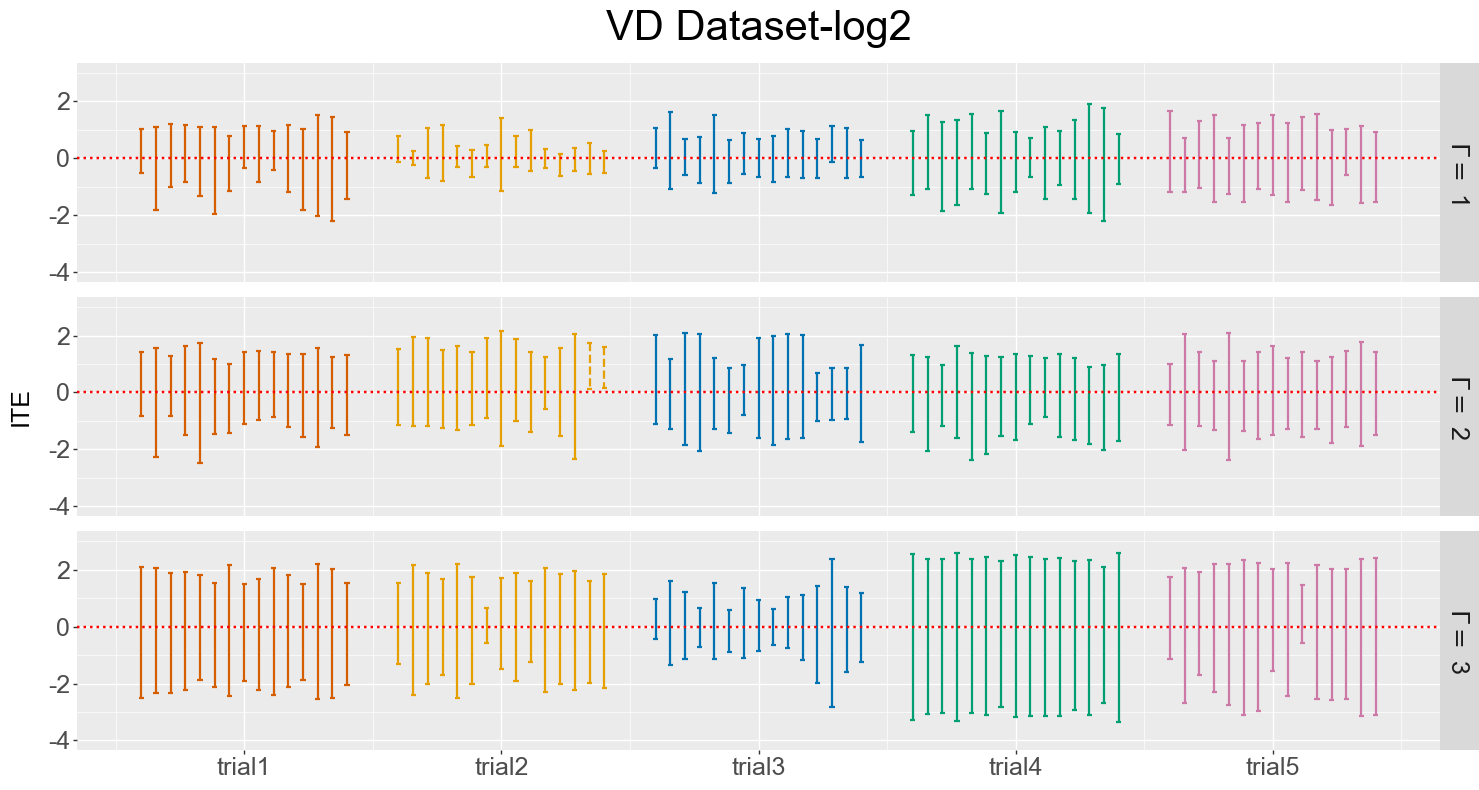

In [16]:
#####三个gamma的ITE
p = ggplot(VD_log2,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-4,3]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('VD Dataset-log2')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

In [17]:
VD,labelpos = process_for_plot(r'../results/ITE/VD/', 0.2, 1, 2, 3, 15, 5)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

In [18]:
VD

,mean_low,mean_high,mean_y1_mean,mean_y0_mean,group_cat,cover,gmm,xpos
0,-4.207145,15.944721,10.148008,25.027329,trial1,1,1,-4.000000
1,-9.338659,7.444366,10.148008,25.027329,trial1,1,1,-3.428571
2,-8.516221,16.006447,10.148008,25.027329,trial1,1,1,-2.857143
3,-10.483653,16.168419,10.148008,25.027329,trial1,1,1,-2.285714
4,-8.980019,7.200035,10.148008,25.027329,trial1,1,1,-1.714286
...,...,...,...,...,...,...,...,...
220,-23.676803,23.125492,53.889454,37.362115,trial5,1,3,41.714286
221,-20.731256,20.372925,53.889454,37.362115,trial5,1,3,42.285714
222,-25.251410,22.917865,53.889454,37.362115,trial5,1,3,42.857143
223,-25.035208,23.137521,53.889454,37.362115,trial5,1,3,43.428571


C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\1249574639.py:6: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


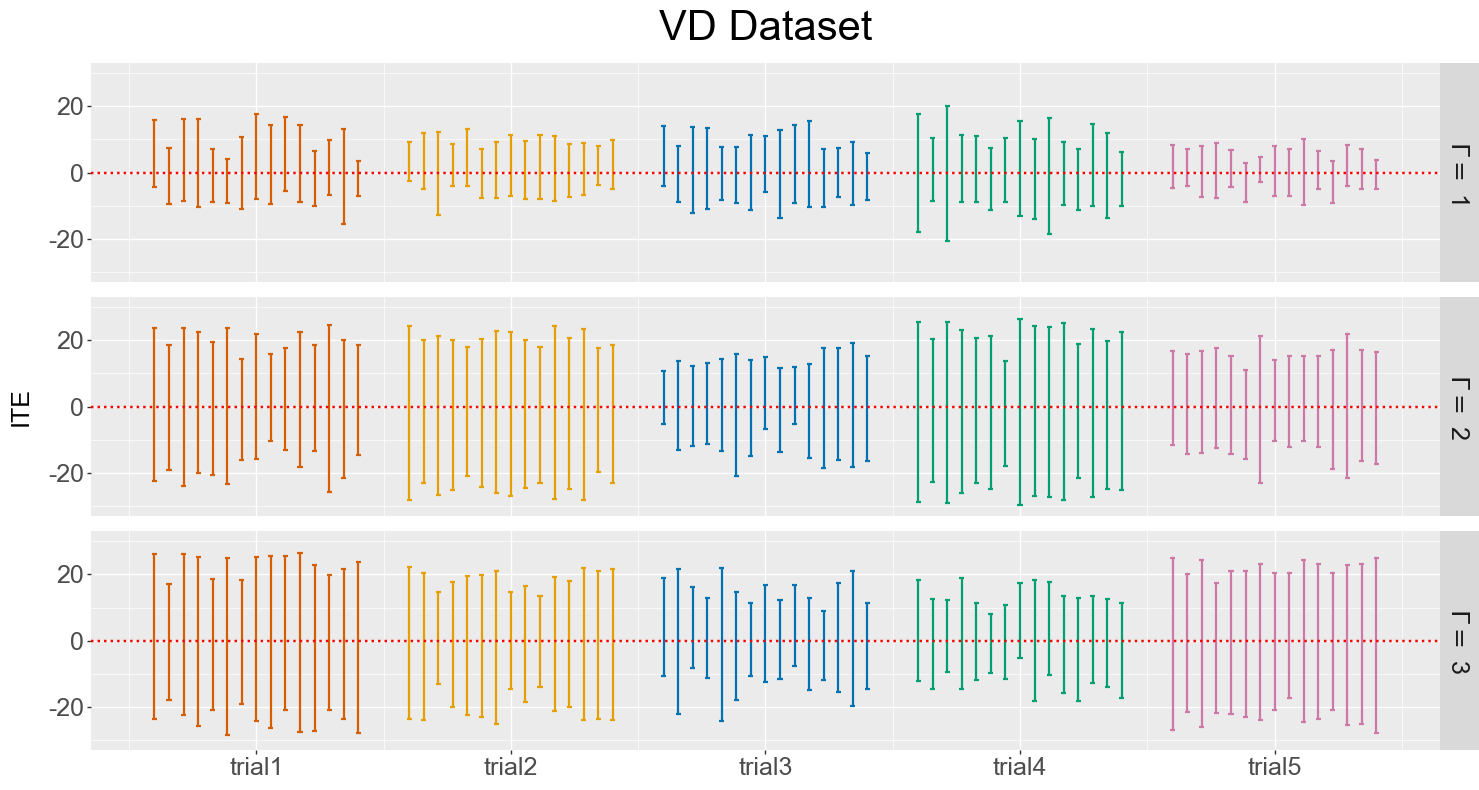

In [19]:
#####三个gamma的ITE
p = ggplot(VD,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-30,30]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('VD Dataset')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

## VK

In [20]:
VK,labelpos = process_for_plot(r'../results/ITE/VK/', 0.2, 1, 2, 3, 16, 5)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\3123951538.py:6: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


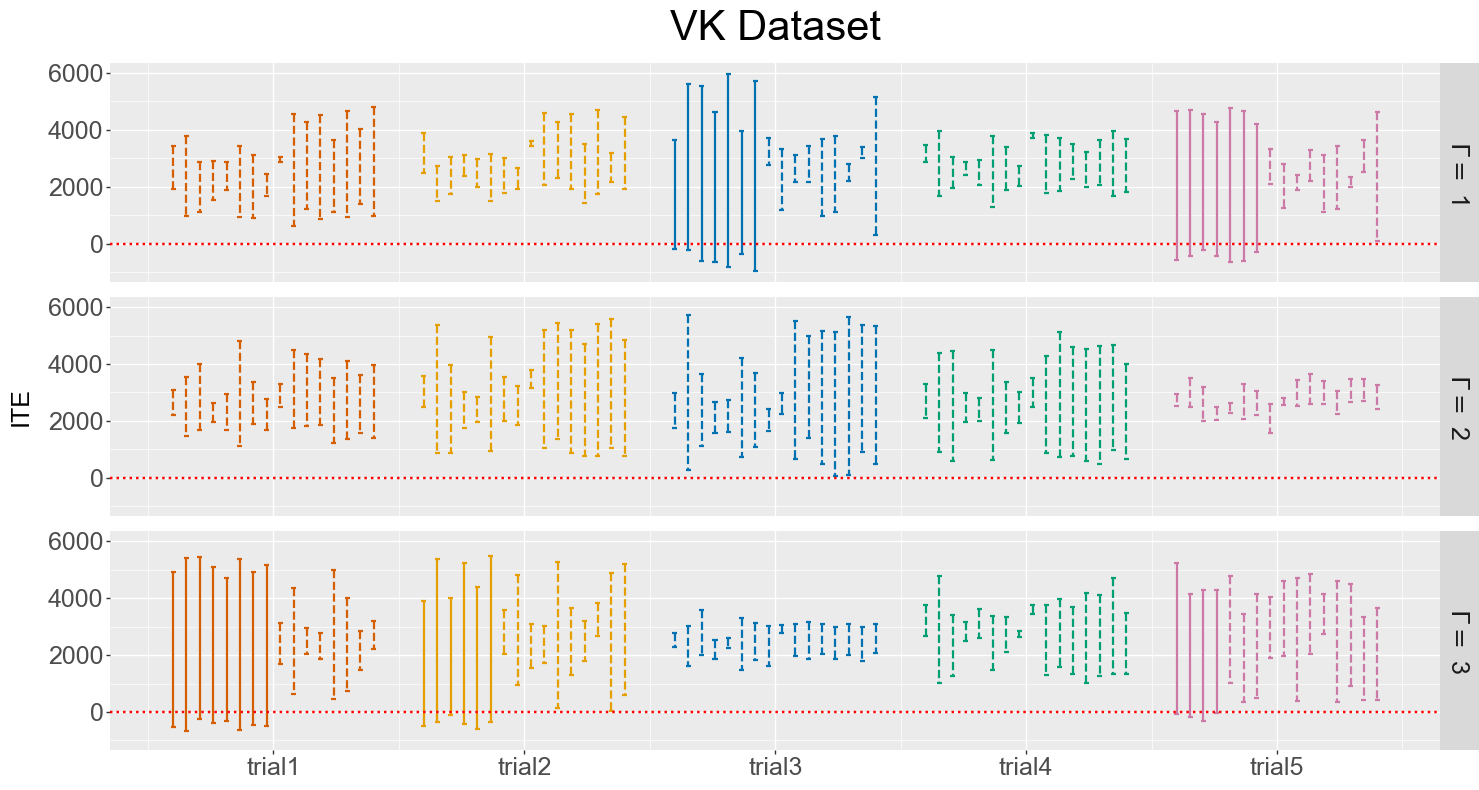

In [21]:
#####三个gamma的ITE
p = ggplot(VK,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-1000,6000]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('VK Dataset')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

In [24]:
VK_log2,labelpos = process_for_plot(r'../results/ITE/VK-log2/', 0.2, 1, 2, 3, 16, 5)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\3249440815.py:6: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


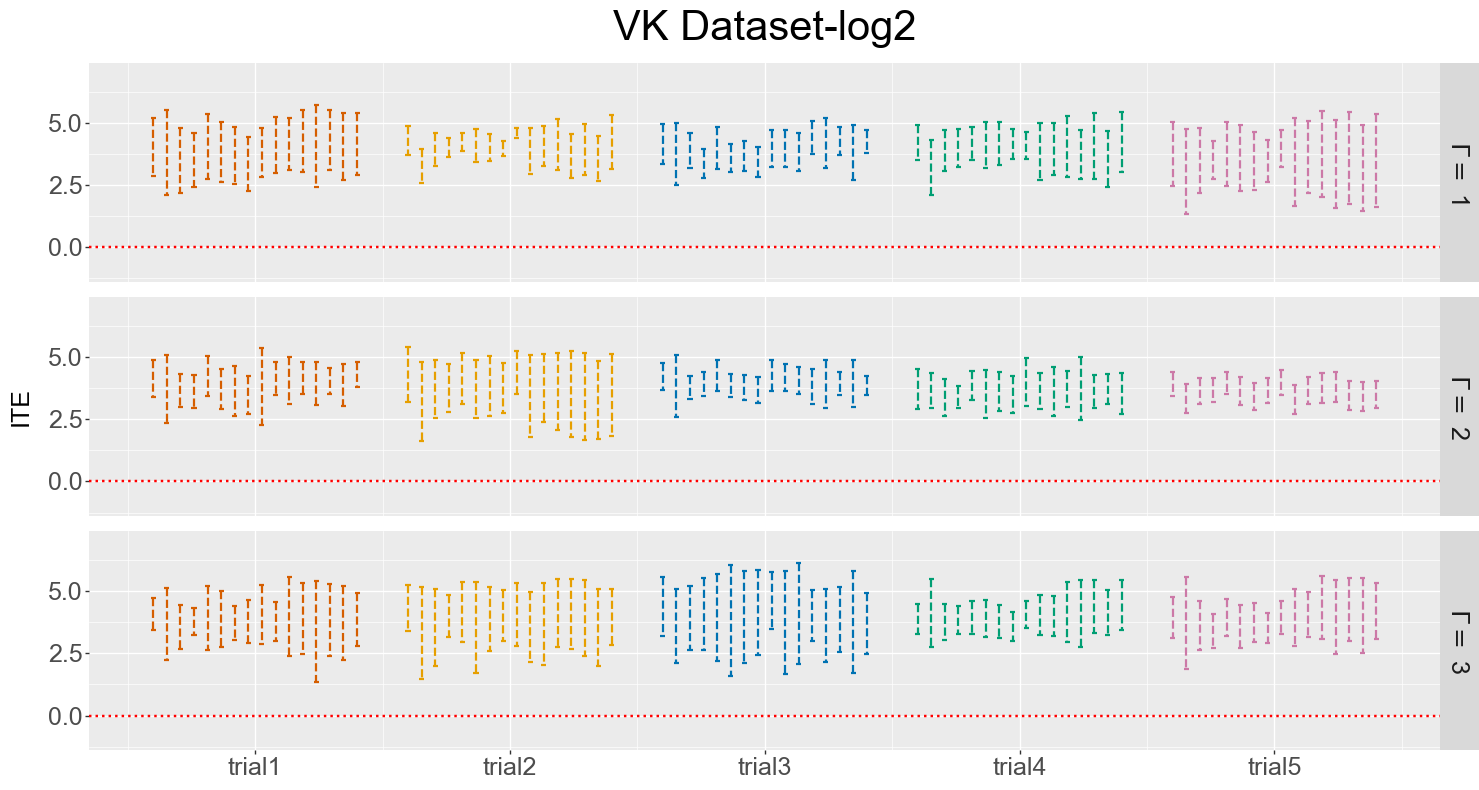

In [25]:
#####三个gamma的ITE
p = ggplot(VK_log2,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-1,7]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('VK Dataset-log2')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

## Data1

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_10896\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_10896\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_10896\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a 

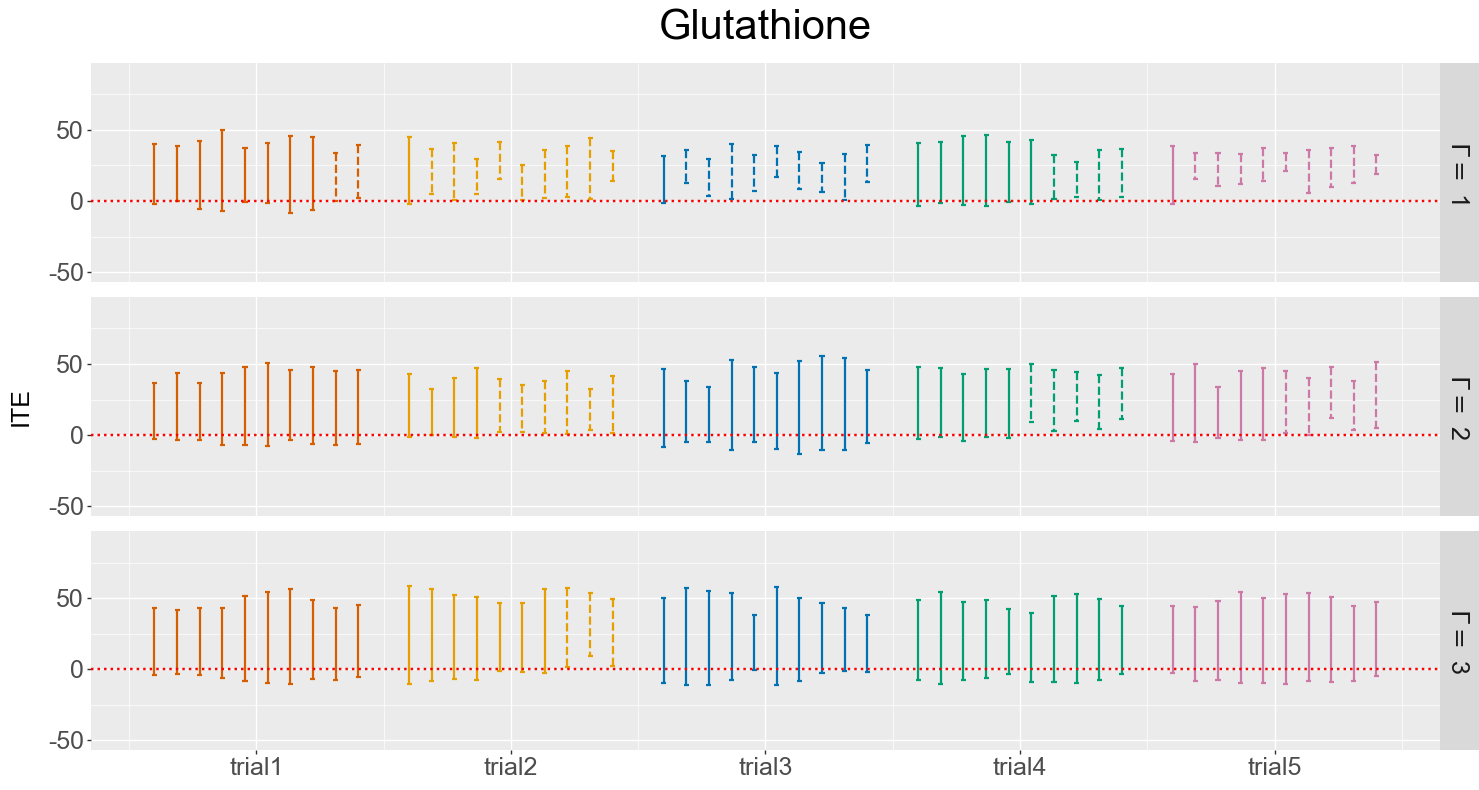

In [18]:
data1,labelpos = process_for_plot(r'../results/ITE/data1-mean/', 0.2, 1, 2, 3, 10, 5)

#####三个gamma的ITE
p = ggplot(data1,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-50,90]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('Glutathione')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

## Data 30

In [8]:
data30,labelpos = process_for_plot(r'../results/ITE/data30/', 0.2, 1, 2, 3, 10, 5)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_8052\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_8052\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_8052\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_8052\2523313093.py:6: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


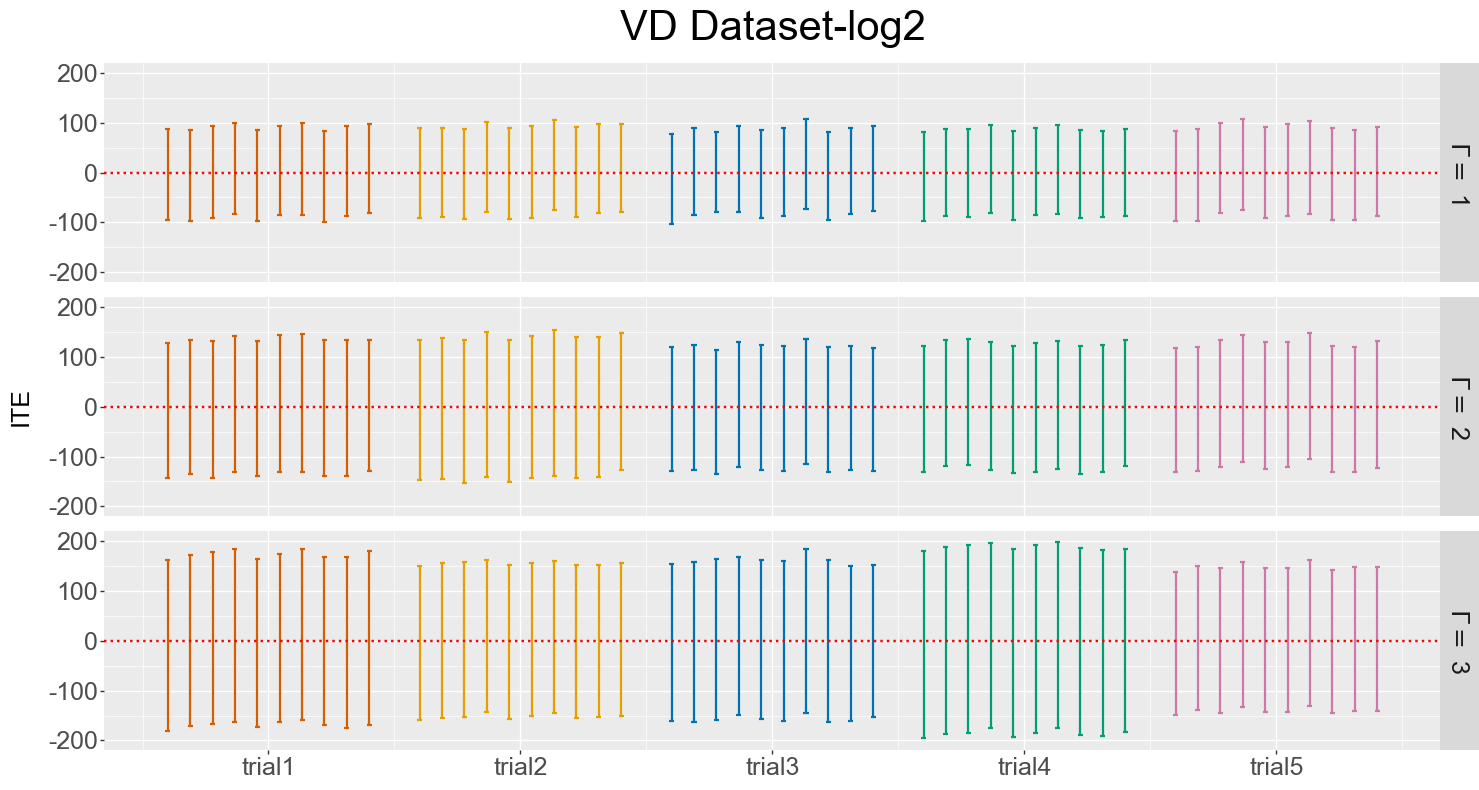

In [9]:
#####三个gamma的ITE
p = ggplot(data30,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-200,200]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('VD Dataset-log2')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

# trial group - n trial

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9
import seaborn as sns
from plotnine import ggplot, aes, geom_errorbar, labs, theme, element_text, scale_x_continuous, scale_linetype_manual, ylim, geom_hline, facet_grid, scale_color_manual, ggtitle, geom_text
from glob import glob

# 设定配色方案
#PALETTE = ['#D55E00', '#E69F00', '#0072B2', '#009E73', '#CC79A7', '#56B4E9']
PALETTE = [
    '#D55E00',  # 暗橙色
    '#E69F00',  # 明黄色
    '#0072B2',  # 深蓝色
    '#009E73',  # 绿色
    '#CC79A7',  # 粉红色
    '#56B4E9',  # 浅蓝色
    '#F39C12',  # 稍深的黄色
    '#0091B7',  # 青蓝色
    '#8E44AD',  # 紫色
    '#E74C3C'   # 红色
]

# 设置 Seaborn 风格
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [ ]:
def read_and_process_files(file_paths, gmm_label):
    """读取多个 CSV 文件，合并成一个 DataFrame，并添加必要的列信息"""
    data_frames = []
    for file in file_paths:
        df = pd.read_csv(file, index_col=None, header=0)
        df = df.iloc[:, 1:]  # 删除第一列
        data_frames.append(df)

    # 合并所有 DataFrame
    combined_df = pd.concat(data_frames, ignore_index=True)

    # 添加 group_cat（实验组编号）
    num_trials = len(data_frames)
    trial_labels = [f'trial{i+1}' for i in range(num_trials)]
    combined_df['group_cat'] = np.repeat(trial_labels, len(combined_df) // num_trials)

    # 添加 cover 列
    combined_df['cover'] = np.where((combined_df['mean_low'] <= 0) & (combined_df['mean_high'] >= 0), 1, 0)

    # 添加 gmm 组别
    combined_df['gmm'] = gmm_label

    return combined_df

def prepare_plot_data(base_path, alpha, gmm_values, num_trials, rr, trial_gap=2):
    """处理数据以用于绘图"""
    all_data = []
    
    # 读取不同gmm组的文件
    for gmm in gmm_values:
        path = f"{base_path}alpha_{alpha}_gmm_{gmm}/"
        file_paths = glob(path + "*.csv")[:num_trials]  # 读取指定数量的文件
        df = read_and_process_files(file_paths, gmm)
        all_data.append(df)

    # 合并所有 gmm 组数据
    final_df = pd.concat(all_data, ignore_index=True)

    # 排序数据，确保每个 group_cat 和 gmm 的顺序一致
    final_df = final_df.sort_values(by=['group_cat', 'gmm',#'cover'
                                        ], ascending=[True, True, 
                                                      #False
                                                      ])

    # 获取实验组别，并计算 x 轴位置
    groups = np.unique(final_df['group_cat'])
    
    # 调整 trial 之间的间距
    label_positions = np.arange(len(groups)) * rr * trial_gap  # 调整不同 trial 之间的间距

    xpos = []
    for trial_idx, group in enumerate(groups):
        group_data = final_df[final_df['group_cat'] == group]
        total_gmm_data = len(group_data)  # 获取该实验组的数据总数

        for gmm in gmm_values:
            # 选择当前 gmm 组的数据
            group_gmm_data = group_data[group_data['gmm'] == gmm]
            group_size = len(group_gmm_data)
            
            # 计算每个数据点的间隔，确保间隔足够，不会重叠
            if group_size > 1:
                interval = rr / (group_size + 1)  # 为每个数据点留出空间
            else:
                interval = 0  # 如果只有一个点，不需要间隔

            # 为当前 gmm 组计算 xpos
            xpos.extend(np.linspace(
                label_positions[trial_idx] - rr / 2,  # 中心位置
                label_positions[trial_idx] + rr / 2,  # 中心位置
                num=group_size
            ))

    # 将 xpos 赋值给 final_df
    final_df['xpos'] = np.array(xpos)

    # 将 group_cat 和 cover 列转换为分类类型
    final_df['group_cat'] = pd.Categorical(final_df['group_cat'])
    final_df['cover'] = pd.Categorical(final_df['cover'], categories=[1, 0])

    return final_df, label_positions

def compute_cover_frequency(df):
    df['cover'] = df['cover'].astype(int)
    freq_df = (
        df.groupby(['id', 'gmm'])['cover']
        .mean()
        .reset_index()
        .rename(columns={'cover': 'cover_freq'})
    )

    return freq_df


C:\Users\EvaSong\AppData\Local\Temp\ipykernel_19552\205413405.py:16: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


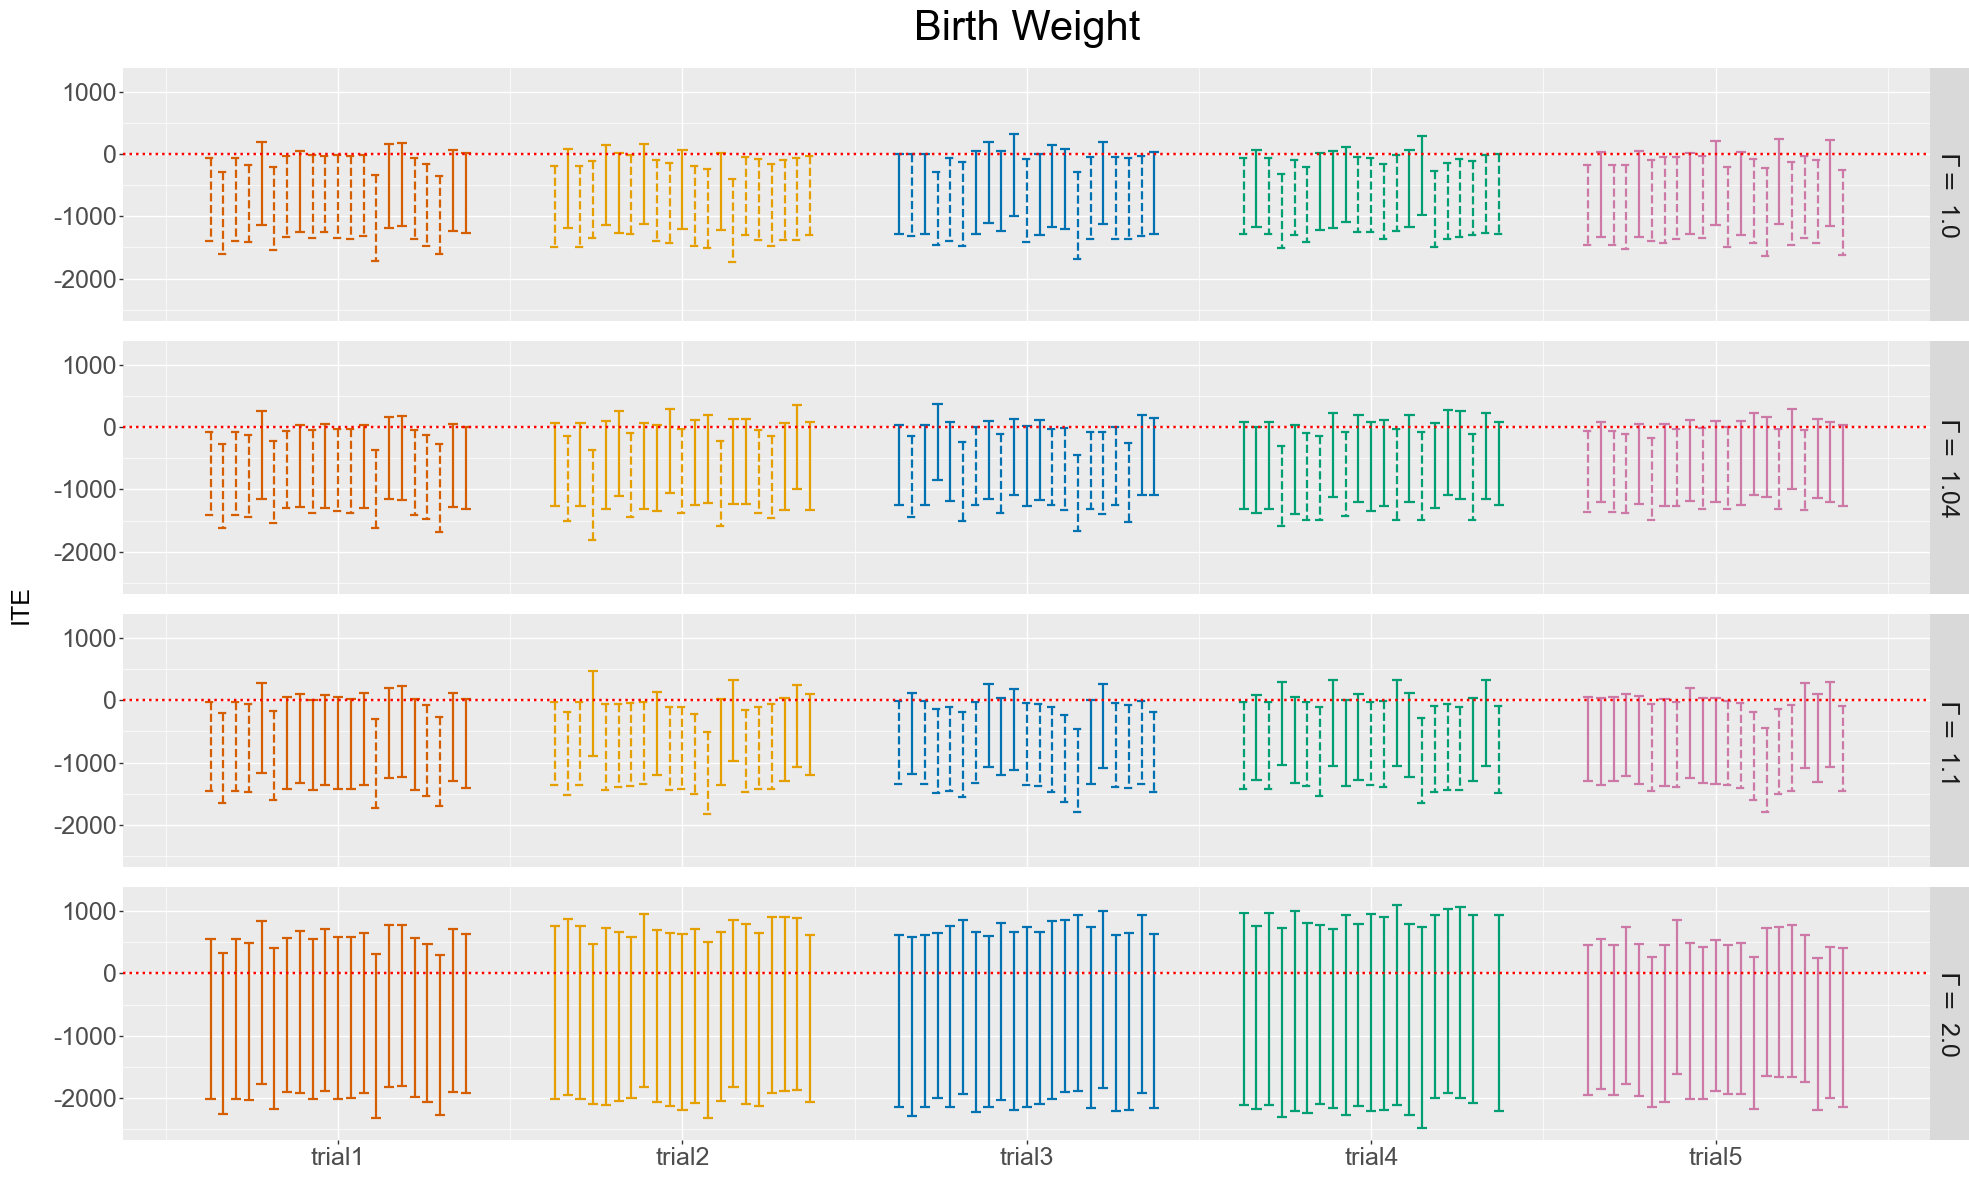

In [ ]:
### birth weight
# 设定参数
base_path = '../results/ITE/bweight-mean_neg/'
alpha = 0.2
gmm_values = [1, 1.04, 1.1, 2]  # 三个 gmm 组
num_trials = 5  # 控制实验次数（列数）
rr = 5

# 处理数据
data, label_positions = prepare_plot_data(base_path, alpha, gmm_values, num_trials, rr, trial_gap=1.35)

# 绘制 ggplot 图
p = (
    ggplot(data, aes(x='xpos', color='group_cat', linetype='cover'))
    + geom_errorbar(aes(ymin='mean_low', ymax='mean_high'), width=0.2, size=0.9)
    + labs(x='', y='ITE')
    + theme(
        figure_size=(20, 12),
        subplots_adjust={'right': 0.8},
        text=element_text(size=18),
        title=element_text(size=18),
        legend_position='none',
        legend_entry_spacing_y=20,
    )
    + scale_x_continuous(breaks=list(label_positions), labels=[f'trial{i+1}' for i in range(len(label_positions))])
    + scale_linetype_manual(values=['solid', 'dashed'])
    + ylim([-2500, 1200])
    + geom_hline(yintercept=0, linetype='dotted', size=1, color='red')
    + facet_grid('gmm ~ .', labeller=lambda s: r'$\Gamma=$ ' + str(s))
    + scale_color_manual(values=PALETTE)
    + ggtitle('Birth Weight')#Glutathione
    + theme(plot_title=element_text(size=30))
)


ggplot.draw(p)


In [ ]:
# 计算 cover 计数
cover_counts = data.groupby(['group_cat', 'gmm', 'cover']).size().unstack(fill_value=0).reset_index()

# 将 xpos 合并到 cover_counts
cover_counts = cover_counts.merge(data[['group_cat', 'gmm', 'xpos']], on=['group_cat', 'gmm'], how='left')

# 确保 xpos 仍然唯一
cover_counts = cover_counts.drop_duplicates(subset=['group_cat', 'gmm'])

cover_counts

# output to csv
cover_counts.to_csv(base_path+'gamma_3_trial_5.csv', index=False)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_19552\3205587087.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


# data 1

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_2556\285547319.py:17: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


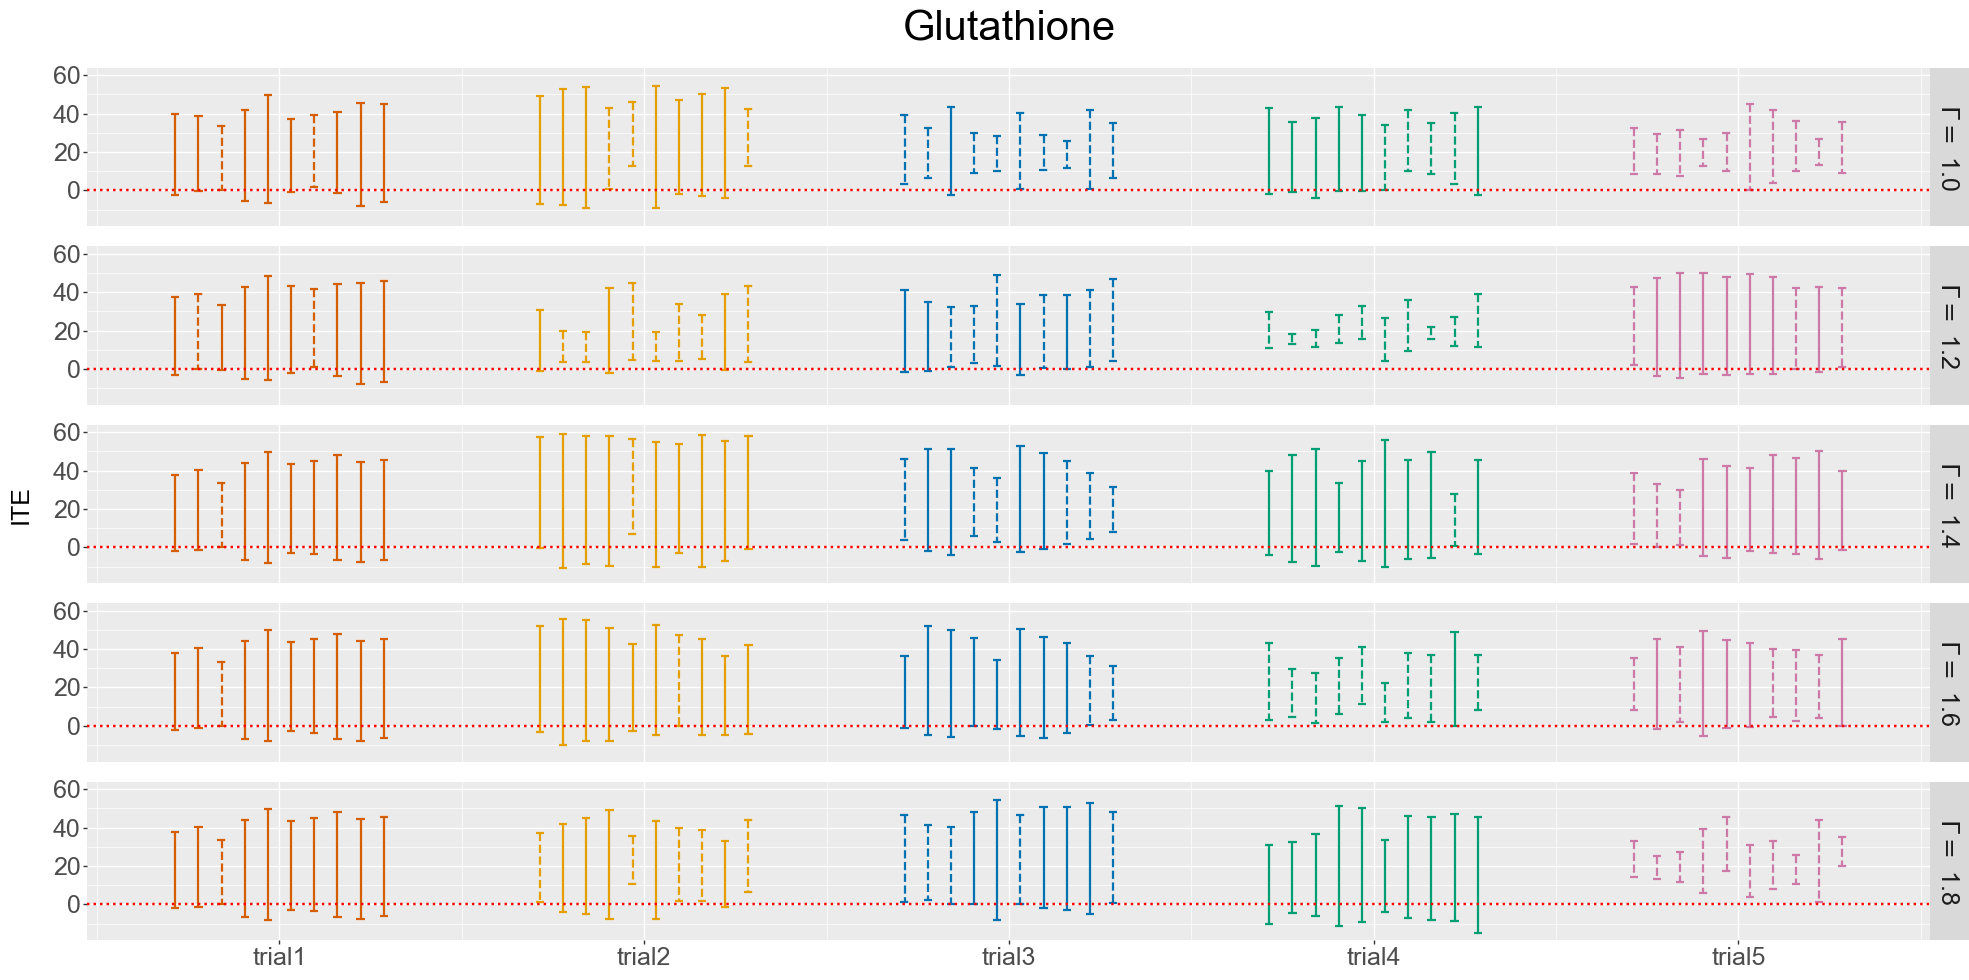

In [63]:
### data 1
# 设定参数
base_path = '../results/ITE/data1-mean/'
alpha = 0.2
gmm_values = [1, 1.2, 1.4, 1.6, 1.8]  # 三个 gmm 组
num_trials = 5  # 控制实验次数（列数）
rr = 5

# 处理数据
data, label_positions = prepare_plot_data(base_path, alpha, gmm_values, num_trials, rr, trial_gap=1.75)

# 绘制 ggplot 图
p = (
    ggplot(data, aes(x='xpos', color='group_cat', linetype='cover'))
    + geom_errorbar(aes(ymin='mean_low', ymax='mean_high'), width=0.2, size=0.9)
    + labs(x='', y='ITE')
    + theme(
        figure_size=(20, 10),
        subplots_adjust={'right': 0.8},
        text=element_text(size=18),
        title=element_text(size=18),
        legend_position='none',
        legend_entry_spacing_y=20,
    )
    + scale_x_continuous(breaks=list(label_positions), labels=[f'trial{i+1}' for i in range(len(label_positions))])
    + scale_linetype_manual(values=['solid', 'dashed'])
    + ylim([-15, 60])
    + geom_hline(yintercept=0, linetype='dotted', size=1, color='red')
    + facet_grid('gmm ~ .', labeller=lambda s: r'$\Gamma=$ ' + str(s))
    + scale_color_manual(values=PALETTE)
    + ggtitle('Glutathione')
    + theme(plot_title=element_text(size=30))
)


ggplot.draw(p)


In [ ]:
# 设定参数
base_path = '../results/ITE/data1-mean/'
alpha = 0.2
gmm_values = [1]  # 三个 gmm 组
num_trials = 5000  # 控制实验次数（列数）
rr = 5

# 处理数据
data, label_positions = prepare_plot_data(base_path, alpha, gmm_values, num_trials, rr, trial_gap=1.75)

compute_cover_frequency(data)

,id,gmm,cover_freq
0,1,1,0.6536
1,2,1,0.5384
2,6,1,0.4614
3,16,1,0.5000
4,23,1,0.2692
5,34,1,0.7306
6,35,1,0.4614
7,38,1,0.4614
8,44,1,0.5768
9,47,1,0.3462


In [80]:
# 设定参数
base_path = '../results/ITE/data1-mean/'
alpha = 0.2
gmm_values = [1, 1.2, 1.4, 1.6, 1.8, 2]  # 三个 gmm 组
num_trials = 500  # 控制实验次数（列数）
rr = 5

# 处理数据
data, label_positions = prepare_plot_data(base_path, alpha, gmm_values, num_trials, rr, trial_gap=1.75)

freqq = compute_cover_frequency(data)

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_uncov_lineplot(df, PALETTE=None):
    """
    分面绘制每个 id 在不同 gamma 下的未覆盖率 (1 - cover_freq)，5 个 id 一组，风格统一
    """
    df = df.copy()
    df['uncov'] = 1 - df['cover_freq']

    unique_ids = sorted(df['id'].unique())
    num_ids = len(unique_ids)
    num_cols = 1
    num_rows = int(np.ceil(num_ids / 5))  # 每行一个 subplot，每个 subplot 显示 5 个 id

    sns.set_style("whitegrid")
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8 * num_rows), sharex=True, sharey=True)

    if num_rows == 1:
        axes = [axes]  # 兼容只有一行时的情况

    if PALETTE is None:
        all_palette = sns.color_palette("tab10", n_colors=5)
    else:
        all_palette = PALETTE

    for i in range(num_rows):
        ax = axes[i]
        ids_subset = unique_ids[i * 5:(i + 1) * 5]
        subset_df = df[df['id'].isin(ids_subset)]

        # 分配颜色
        palette_dict = {id_: all_palette[j % len(all_palette)] for j, id_ in enumerate(ids_subset)}

        sns.lineplot(
            data=subset_df,
            x='gmm',
            y='uncov',
            hue='id',
            marker='o',
            linewidth=2,
            markersize=6,
            palette=palette_dict,
            ax=ax,
            legend=True
        )

        ax.set_title(f'Results for Patients ID {ids_subset[0]}–{ids_subset[-1]}', fontsize=20)
        ax.set_xlabel(r'$\Gamma$', fontsize=20)
        ax.set_ylabel('Positive ITE Proportion', fontsize=20)
        ax.axhline(y=0, linestyle='dotted', linewidth=1.5, color='red')
        ax.set_ylim([-0.05, 1.05])
        ax.tick_params(labelsize=20)

        # 控制 legend 格式
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, title='id', fontsize=20, title_fontsize=25, loc='best')

    plt.tight_layout()
    plt.show()


In [104]:
freqq

,id,gmm,cover_freq
0,1,1.0,0.654
1,1,1.2,0.610
2,1,1.4,0.662
3,1,1.6,0.664
4,1,1.8,0.726
5,1,2.0,0.842
6,2,1.0,0.536
7,2,1.2,0.726
8,2,1.4,0.778
9,2,1.6,0.762


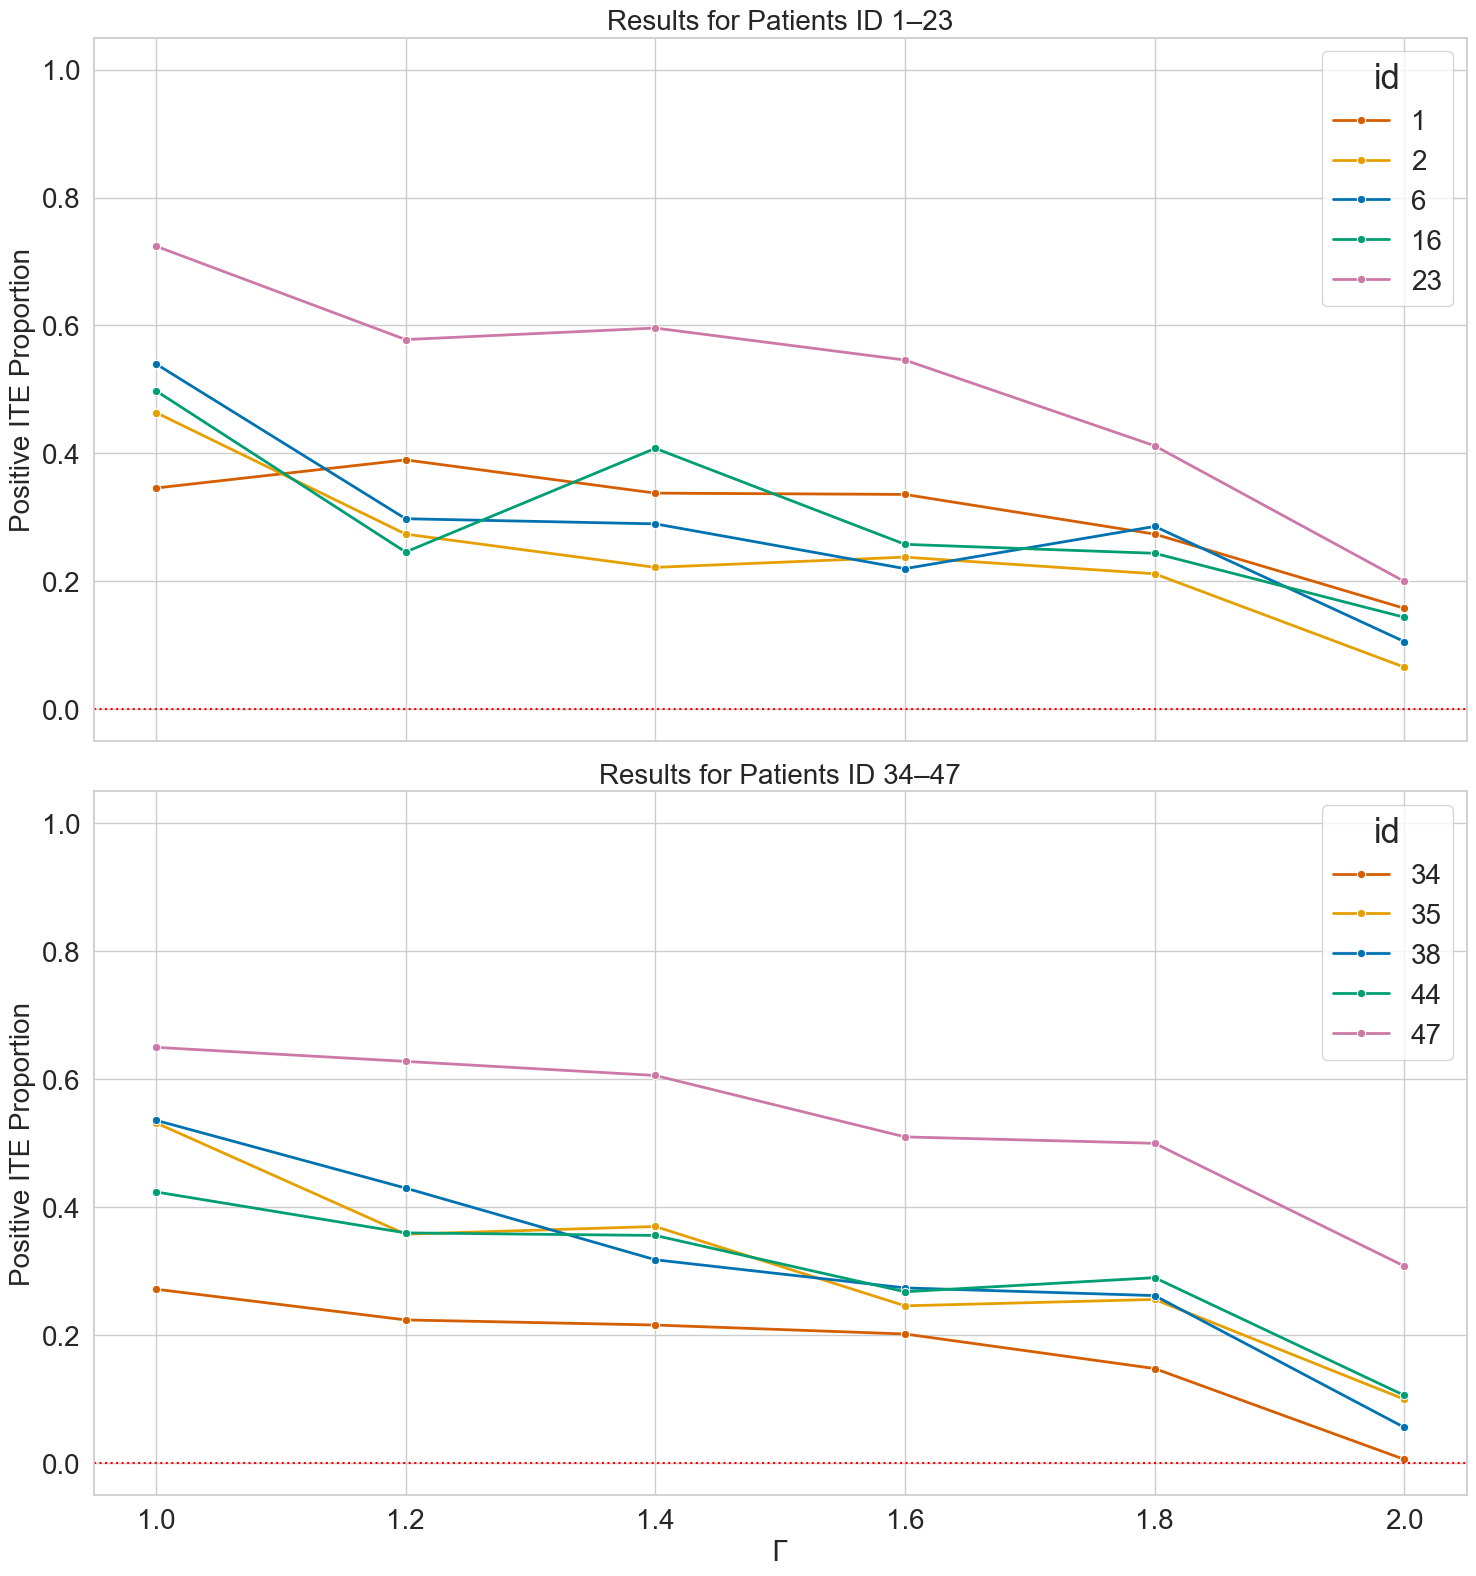

In [103]:
plot_uncov_lineplot(freqq, PALETTE=PALETTE)

In [9]:
# 计算 cover 计数
cover_counts = data.groupby(['group_cat', 'gmm', 'cover']).size().unstack(fill_value=0).reset_index()

# 将 xpos 合并到 cover_counts
cover_counts = cover_counts.merge(data[['group_cat', 'gmm', 'xpos']], on=['group_cat', 'gmm'], how='left')

# 确保 xpos 仍然唯一
cover_counts = cover_counts.drop_duplicates(subset=['group_cat', 'gmm'])

print(cover_counts)

# output to csv
cover_counts.to_csv(base_path+'gamma_7_trial_10.csv', index=False)

    group_cat  gmm   1  0   xpos
0      trial1  1.0   8  2  -2.50
10     trial1  1.2   8  2  -2.50
20     trial1  1.4   9  1  -2.50
30     trial1  1.6   9  1  -2.50
40     trial1  1.8   9  1  -2.50
..        ...  ...  .. ..    ...
650    trial9  1.4   7  3  76.25
660    trial9  1.6  10  0  76.25
670    trial9  1.8   9  1  76.25
680    trial9  2.0   3  7  76.25
690    trial9  3.0  10  0  76.25

[70 rows x 5 columns]


C:\Users\EvaSong\AppData\Local\Temp\ipykernel_2556\2151395219.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


# VD

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_2556\3794363233.py:17: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


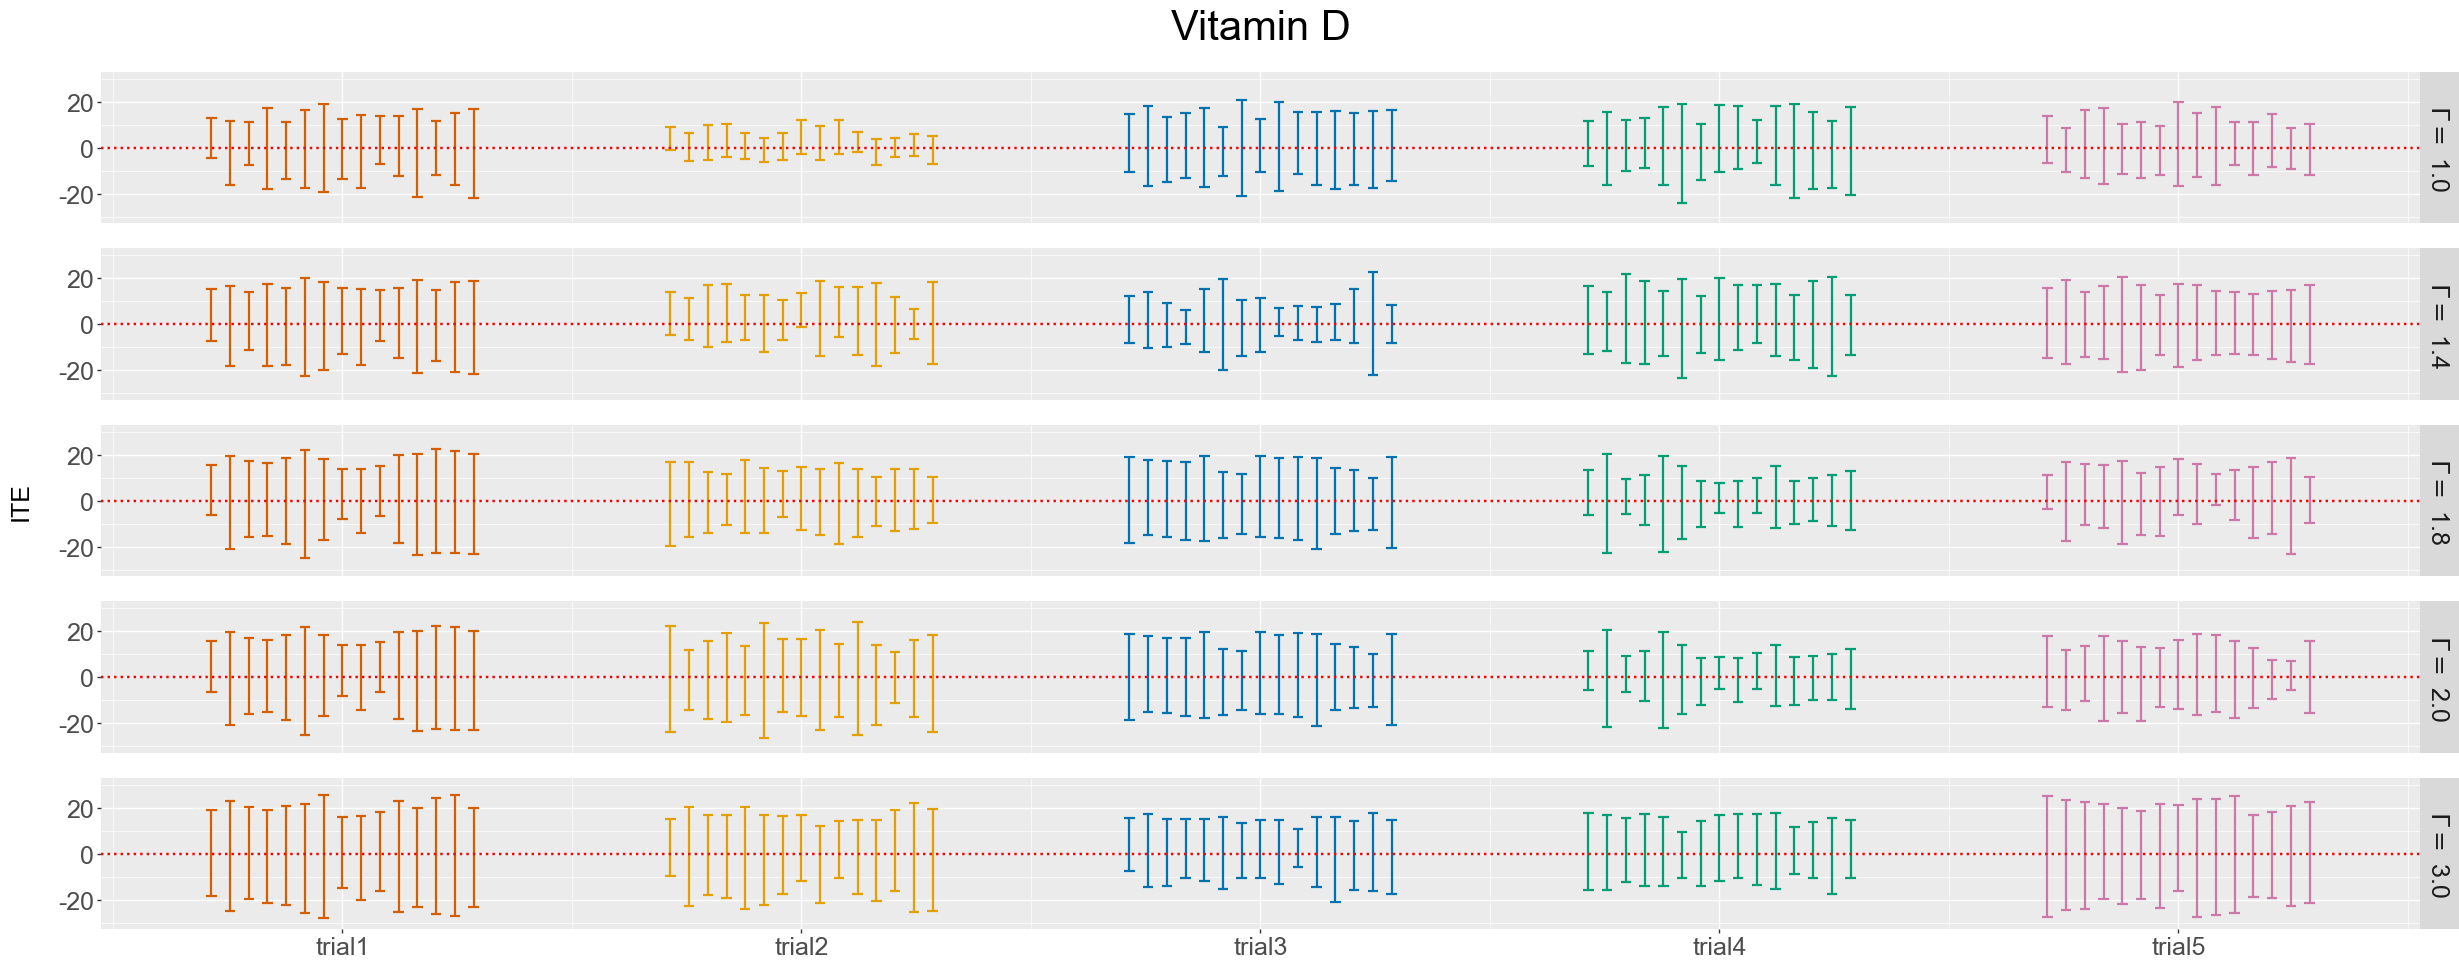

In [69]:
### data 1
# 设定参数
base_path = '../results/ITE/VD-mean/'
alpha = 0.2
gmm_values = [1, 1.4, 1.8, 2, 3]  # 三个 gmm 组
num_trials = 5  # 控制实验次数（列数）
rr = 5

# 处理数据
data, label_positions = prepare_plot_data(base_path, alpha, gmm_values, num_trials, rr, trial_gap=1.75)

# 绘制 ggplot 图
p = (
    ggplot(data, aes(x='xpos', color='group_cat', linetype='cover'))
    + geom_errorbar(aes(ymin='mean_low', ymax='mean_high'), width=0.2, size=0.9)
    + labs(x='', y='ITE')
    + theme(
        figure_size=(25, 10),
        subplots_adjust={'right': 0.8},
        text=element_text(size=18),
        title=element_text(size=18),
        legend_position='none',
        legend_entry_spacing_y=20,
    )
    + scale_x_continuous(breaks=list(label_positions), labels=[f'trial{i+1}' for i in range(len(label_positions))])
    + scale_linetype_manual(values=['solid', 'dashed'])
    + ylim([-30, 30])
    + geom_hline(yintercept=0, linetype='dotted', size=1, color='red')
    + facet_grid('gmm ~ .', labeller=lambda s: r'$\Gamma=$ ' + str(s))
    + scale_color_manual(values=PALETTE)
    + ggtitle('Vitamin D')
    + theme(plot_title=element_text(size=30))
)


ggplot.draw(p)


# VK

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_2556\790725046.py:17: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


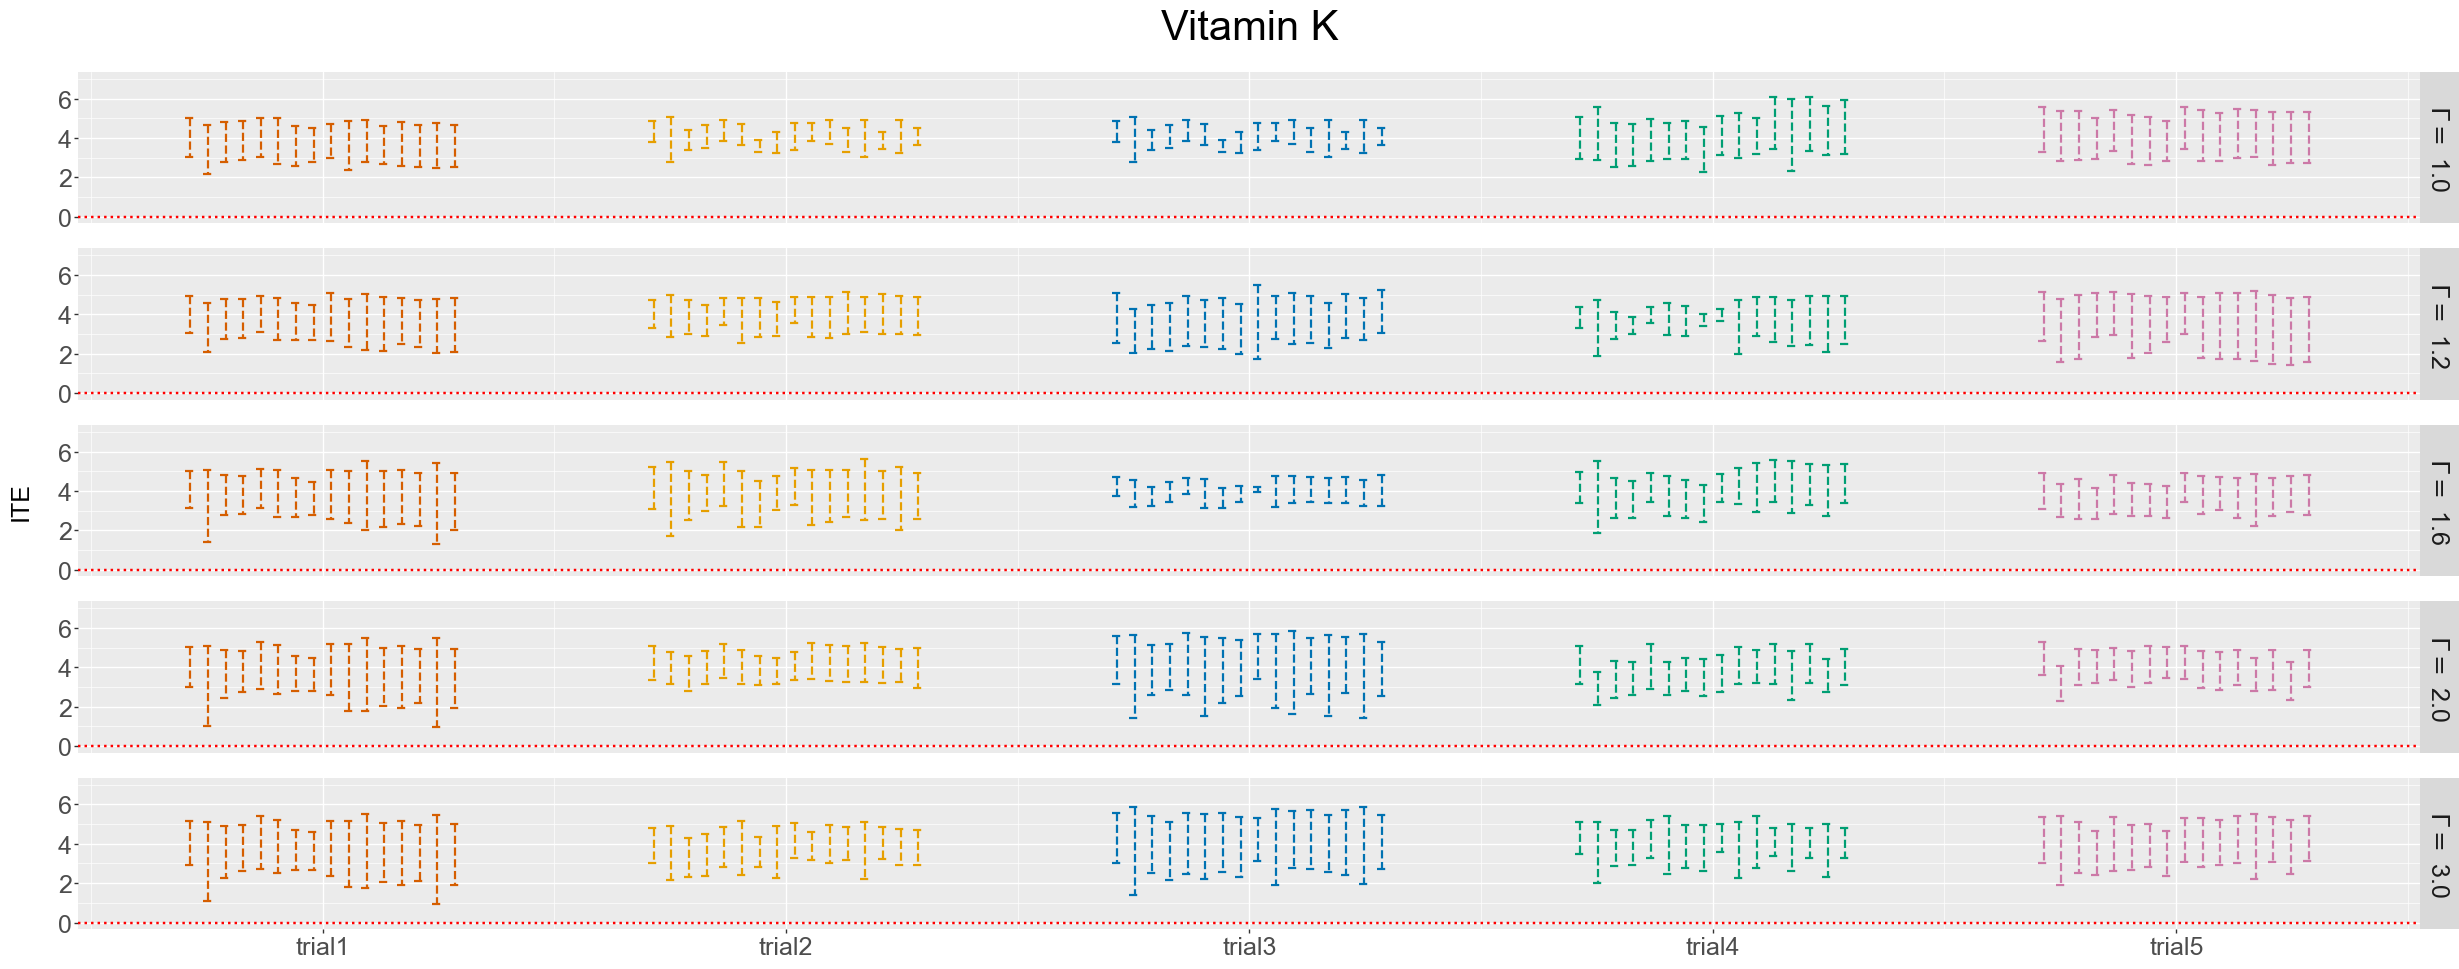

In [54]:
### data 1
# 设定参数
base_path = '../results/ITE/VK2-mean/'
alpha = 0.2
gmm_values = [1, 1.2, 1.6, 2, 3]  # 三个 gmm 组
num_trials = 5  # 控制实验次数（列数）
rr = 5

# 处理数据
data, label_positions = prepare_plot_data(base_path, alpha, gmm_values, num_trials, rr, trial_gap=1.75)

# 绘制 ggplot 图
p = (
    ggplot(data, aes(x='xpos', color='group_cat', linetype='cover'))
    + geom_errorbar(aes(ymin='mean_low', ymax='mean_high'), width=0.2, size=0.9)
    + labs(x='', y='ITE')
    + theme(
        figure_size=(25, 10),
        subplots_adjust={'right': 0.8},
        text=element_text(size=18),
        title=element_text(size=18),
        legend_position='none',
        legend_entry_spacing_y=20,
    )
    + scale_x_continuous(breaks=list(label_positions), labels=[f'trial{i+1}' for i in range(len(label_positions))])
    + scale_linetype_manual(values=['solid', 'dashed'])
    + ylim([0, 7])
    + geom_hline(yintercept=0, linetype='dotted', size=1, color='red')
    + facet_grid('gmm ~ .', labeller=lambda s: r'$\Gamma=$ ' + str(s))
    + scale_color_manual(values=PALETTE)
    + ggtitle('Vitamin K')
    + theme(plot_title=element_text(size=30))
)


ggplot.draw(p)


In [50]:
# 设定参数
base_path = '../results/ITE/VK2-mean/'
alpha = 0.2
gmm_values = [1]  # 三个 gmm 组
num_trials = 100  # 控制实验次数（列数）
rr = 5

# 处理数据
data, label_positions = prepare_plot_data(base_path, alpha, gmm_values, num_trials, rr, trial_gap=1.75)


compute_cover_frequency(data)

,id,gmm,cover_freq
0,2,1,0.0
1,3,1,0.0
2,4,1,0.0
3,22,1,0.0
4,24,1,0.0
5,30,1,0.0
6,33,1,0.0
7,35,1,0.0
8,37,1,0.0
9,47,1,0.0
